![](img.png)

In [153]:
import sys
import os
from main import VerticeAnalysis
from plot import plot_vertice
import pandas as pd
import matplotlib.pyplot as plt

In [154]:
config0 = pd.read_csv('config0.csv')

x = config0.x.to_numpy()
y = config0.y.to_numpy()
mx = config0.mx.to_numpy()
my = config0.my.to_numpy()

In [155]:
model = VerticeAnalysis(x, y, mx, my)

In [156]:
kwargs = {
    'cmap': 'flatspin'
}

In [157]:
entries = os.listdir(path='parquets/')
files = [file for file in entries if 'config' in file]
files = pd.DataFrame(files, columns=['files'])

temps = []
for i in files.files.to_list():
    temps.append(float(i.strip('config_').strip('.parquet')))
files['temps'] = temps
files = files.sort_values(by='temps').reset_index()
files = files.drop('index', axis=1)
files.head()

,files,temps
0,config_0.005000.parquet,0.0050
1,config_0.006300.parquet,0.0063
2,config_0.007900.parquet,0.0079
3,config_0.010000.parquet,0.0100
4,config_0.012600.parquet,0.0126


In [160]:
import numpy as np
medias = []
stds = []
for file in files.files:
    Spins = pd.read_parquet('parquets/'+file)
    Spins = Spins.T
    carga = []
    for i in range(Spins.shape[1]):
        model.Spin = Spins[i].to_numpy()
        model.calc_charge()
        carga.append(model.charge)
    medias.append(np.mean(carga, axis=0))
    stds.append(np.std(carga, axis=0))
    
medias


[array([ 3., -3.,  0.,  3., -3.,  0.,  3., -3.,  0., -9.,  9.,  0.,  3.,
        -3.,  0.,  3., -3.,  0., -9.,  9.,  0.,  3., -3.,  0.,  3., -3.,
         0., -9.,  9.,  0., -9.,  9.,  0.,  3., -3.,  0.,  3., -3.,  0.,
         3., -3.,  0., -9.,  9.,  0.,  3., -3.,  0.,  3., -3.,  0., -9.,
         9.,  0.,  3., -3.,  0.,  3., -3.,  0.,  3., -3.,  0.,  3., -3.,
         0.,  3., -3.,  0., -9.,  9.,  0.,  3., -3.,  0.,  3., -3.,  0.,
        -9.,  9.,  0.,  3., -3.,  0.,  3., -3.,  0., -9.,  9.,  0., -9.,
         9.,  0.,  3., -3.,  0.,  3., -3.,  0.,  3., -3.,  0., -9.,  9.,
         0.,  3., -3.,  0.,  3., -3.,  0., -9.,  9.,  0.,  3., -3.,  0.,
         3., -3.,  0.,  3., -3.,  0.,  3., -3.,  0.,  3., -3.,  0., -9.,
         9.,  0.,  3., -3.,  0.,  3., -3.,  0., -9.,  9.,  0.,  3., -3.,
         0.,  3., -3.,  0., -9.,  9.,  0., -9.,  9.,  0.,  3., -3.,  0.,
         3., -3.,  0.,  3., -3.,  0., -9.,  9.,  0.,  3., -3.,  0.,  3.,
        -3.,  0., -9.,  9.,  0.,  3., -3.,  0.,  3.

In [161]:
temps = files.temps.T
mean = pd.DataFrame(medias)
std = pd.DataFrame(stds)
mean2 = pd.concat([temps, mean], axis=1)
stds2 = pd.concat([temps, std], axis=1)

In [162]:
mean2.head()

,temps,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
0,0.0050,3.0000,-3.0000,0.0,3.0,-3.0,0.0,3.0000,-3.0000,0.0,...,0.0,-9.0000,9.0000,0.0,3.0000,-3.0000,0.0,3.0,-3.0,0.0
1,0.0063,3.0000,-3.0000,0.0,3.0,-3.0,0.0,3.0000,-3.0000,0.0,...,0.0,-9.0000,9.0000,0.0,3.0000,-3.0000,0.0,3.0,-3.0,0.0
2,0.0079,3.0000,-3.0000,0.0,3.0,-3.0,0.0,3.0000,-3.0000,0.0,...,0.0,-9.0000,9.0000,0.0,3.0000,-3.0000,0.0,3.0,-3.0,0.0
3,0.0100,-0.5328,0.5328,0.0,3.0,-3.0,0.0,3.0000,-3.0000,0.0,...,0.0,-8.6364,8.6364,0.0,2.6364,-2.6364,0.0,3.0,-3.0,0.0
4,0.0126,0.1704,-0.1704,0.0,3.0,-3.0,0.0,-0.4908,0.4908,0.0,...,0.0,-8.9916,8.9916,0.0,2.9916,-2.9916,0.0,3.0,-3.0,0.0


In [163]:
std.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,4.884981e-15,4.884981e-15,0.0,4.884981e-15,4.884981e-15,0.0,4.884981e-15,4.884981e-15,0.0,1.776357e-15,...,0.0,1.243450e-14,3.907985e-14,0.0,1.287859e-14,2.309264e-14,0.0,1.287859e-14,2.309264e-14,0.0
1,4.884981e-15,4.884981e-15,0.0,4.884981e-15,4.884981e-15,0.0,4.884981e-15,4.884981e-15,0.0,1.776357e-15,...,0.0,1.243450e-14,3.907985e-14,0.0,1.287859e-14,2.309264e-14,0.0,1.287859e-14,2.309264e-14,0.0
2,4.884981e-15,4.884981e-15,0.0,4.884981e-15,4.884981e-15,0.0,4.884981e-15,4.884981e-15,0.0,1.776357e-15,...,0.0,1.243450e-14,3.907985e-14,0.0,1.287859e-14,2.309264e-14,0.0,1.287859e-14,2.309264e-14,0.0
3,5.469271e+00,5.469271e+00,0.0,4.884981e-15,4.884981e-15,0.0,4.884981e-15,4.884981e-15,0.0,1.776357e-15,...,0.0,2.056938e+00,2.056938e+00,0.0,2.056938e+00,2.056938e+00,0.0,1.287859e-14,2.309264e-14,0.0
4,5.093973e+00,5.093973e+00,0.0,4.884981e-15,4.884981e-15,0.0,5.450130e+00,5.450130e+00,0.0,5.450130e+00,...,0.0,3.173790e-01,3.173790e-01,0.0,3.173790e-01,3.173790e-01,0.0,1.287859e-14,2.309264e-14,0.0


In [164]:
mean2.T

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
temps,0.005,0.0063,0.0079,0.0100,0.0126,0.0158,0.0199,0.0251,3.150000e-02,0.0397,...,62.9463,79.2447,99.7631,125.5943,158.1139,199.0536,250.5936,315.4787,397.1641,500.0000
0,3.000,3.0000,3.0000,-0.5328,0.1704,-4.9104,-0.6924,0.5424,-4.584000e-01,-0.5724,...,-0.0360,-0.0126,-0.0036,0.0456,0.0228,-0.0786,0.0498,-0.1098,-0.0360,0.0546
1,-3.000,-3.0000,-3.0000,0.5328,-0.1704,4.9104,0.6924,-0.5424,4.584000e-01,0.5724,...,-2.7666,-2.9562,-2.9526,-3.0144,-3.0276,-3.0048,-3.0108,-2.9904,-3.0684,-3.1572
2,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000e+00,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,3.000,3.0000,3.0000,3.0000,3.0000,2.3088,0.5880,-1.2912,-4.140000e-01,-0.3384,...,0.1086,0.0612,0.0594,0.0606,-0.0414,0.0018,0.0384,0.0624,0.0456,0.0438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,-3.000,-3.0000,-3.0000,-2.6364,-2.9916,3.8808,-0.6144,-0.2892,-1.635136e-16,0.2724,...,0.0450,-0.0258,-0.0030,0.0132,0.0036,-0.0162,-0.0252,0.0708,-0.0180,0.0978
296,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000e+00,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
297,3.000,3.0000,3.0000,3.0000,3.0000,2.8680,0.4008,-1.7412,-1.196400e+00,-0.5160,...,0.0462,0.0372,0.0204,-0.0996,0.0432,0.0204,0.0426,0.0168,0.0372,0.1386
298,-3.000,-3.0000,-3.0000,-3.0000,-3.0000,-2.8680,-0.4008,1.7412,1.196400e+00,0.5160,...,-0.0792,0.0270,0.0612,0.0426,-0.0444,0.0636,-0.0048,0.0438,-0.0594,-0.0336


In [165]:
mean2['media'] = np.abs(mean2[1:].mean())
mean2

,temps,0,1,2,3,4,5,6,7,8,...,291,292,293,294,295,296,297,298,299,media
0,0.0050,3.0000,-3.0000,0.0,3.0000,-3.0000,0.0,3.0000,-3.0000,0.0,...,-9.0000,9.0000,0.0,3.000000e+00,-3.000000e+00,0.0,3.0000,-3.000000e+00,0.0,0.047484
1,0.0063,3.0000,-3.0000,0.0,3.0000,-3.0000,0.0,3.0000,-3.0000,0.0,...,-9.0000,9.0000,0.0,3.000000e+00,-3.000000e+00,0.0,3.0000,-3.000000e+00,0.0,1.200384
2,0.0079,3.0000,-3.0000,0.0,3.0000,-3.0000,0.0,3.0000,-3.0000,0.0,...,-9.0000,9.0000,0.0,3.000000e+00,-3.000000e+00,0.0,3.0000,-3.000000e+00,0.0,0.000000
3,0.0100,-0.5328,0.5328,0.0,3.0000,-3.0000,0.0,3.0000,-3.0000,0.0,...,-8.6364,8.6364,0.0,2.636400e+00,-2.636400e+00,0.0,3.0000,-3.000000e+00,0.0,0.189756
4,0.0126,0.1704,-0.1704,0.0,3.0000,-3.0000,0.0,-0.4908,0.4908,0.0,...,-8.9916,8.9916,0.0,2.991600e+00,-2.991600e+00,0.0,3.0000,-3.000000e+00,0.0,1.433904
5,0.0158,-4.9104,4.9104,0.0,2.3088,-2.3088,0.0,1.7988,-1.7988,0.0,...,-1.9872,1.9872,0.0,-3.880800e+00,3.880800e+00,0.0,2.8680,-2.868000e+00,0.0,0.000000
6,0.0199,-0.6924,0.6924,0.0,0.5880,-0.5880,0.0,0.3864,-0.3864,0.0,...,-3.0168,3.0168,0.0,6.144000e-01,-6.144000e-01,0.0,0.4008,-4.008000e-01,0.0,0.108576
7,0.0251,0.5424,-0.5424,0.0,-1.2912,1.2912,0.0,-1.3416,1.3416,0.0,...,0.2676,-0.2676,0.0,2.892000e-01,-2.892000e-01,0.0,-1.7412,1.741200e+00,0.0,1.371444
8,0.0315,-0.4584,0.4584,0.0,-0.4140,0.4140,0.0,-1.2060,1.2060,0.0,...,-0.1596,0.1596,0.0,-6.605383e-16,-1.635136e-16,0.0,-1.1964,1.196400e+00,0.0,0.000000
9,0.0397,-0.5724,0.5724,0.0,-0.3384,0.3384,0.0,-0.7476,0.7476,0.0,...,-0.7104,0.7104,0.0,-2.724000e-01,2.724000e-01,0.0,-0.5160,5.160000e-01,0.0,0.842904


In [224]:
dfteste2 = pd.DataFrame(medias).T

for i in range(dfteste2.shape[1]):
    print(f'Temperatura = {temps[i]}', '\n\n' ,f'{np.around(np.round(dfteste2[i],2).value_counts()/3, 2)}',
          '\n------------------------\n')

Temperatura = 0.005 

  0.0    33.33
 3.0    23.33
-3.0    23.33
-9.0    10.00
 9.0    10.00
Name: 0, dtype: float64 
------------------------

Temperatura = 0.0063 

  0.0    33.33
 3.0    23.33
-3.0    23.33
-9.0    10.00
 9.0    10.00
Name: 1, dtype: float64 
------------------------

Temperatura = 0.0079 

  0.0    33.33
 3.0    23.33
-3.0    23.33
-9.0    10.00
 9.0    10.00
Name: 2, dtype: float64 
------------------------

Temperatura = 0.01 

  0.00    33.33
 3.00    18.33
-3.00    18.33
-9.00     5.00
 9.00     5.00
-0.53     1.67
 0.53     1.67
-5.47     1.67
 5.47     1.67
 2.64     1.00
 8.64     1.00
-8.64     1.00
 8.46     1.00
-8.46     1.00
-2.46     1.00
 2.46     1.00
-2.64     1.00
-8.63     0.67
 8.63     0.67
 2.63     0.67
-2.63     0.67
 2.45     0.67
-2.45     0.67
-8.45     0.67
 8.45     0.67
Name: 3, dtype: float64 
------------------------

Temperatura = 0.0126 

  0.00    33.33
 3.00    15.00
-3.00    15.00
-9.00     1.67
-2.99     1.67
 8.99     1.67
 3.2

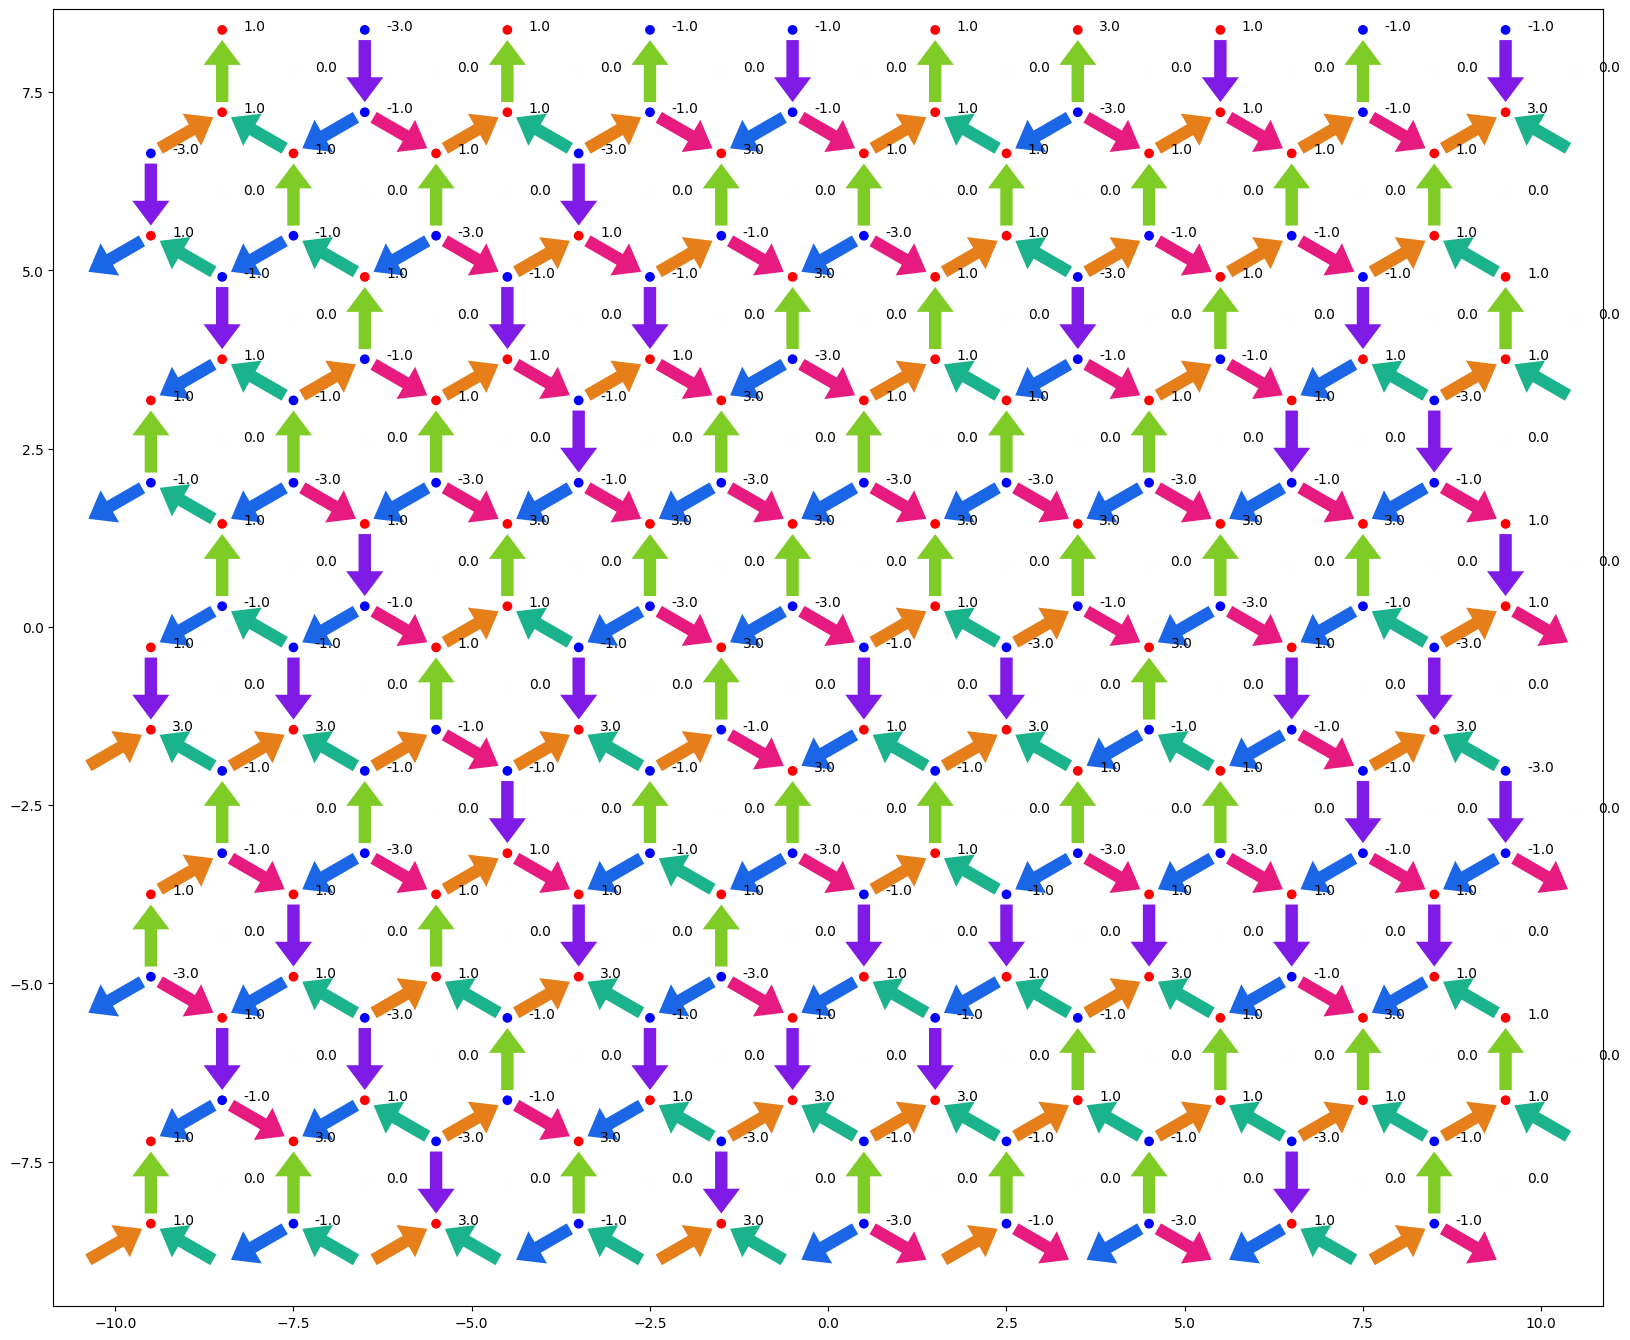

In [225]:
plt.figure(figsize=(20, 20))
ax = plt.gca()
model.plot_model(ax=ax, **kwargs)
plot_vertice(model.v_x, model.v_y, model.charge/3, ax=ax, label=True)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [434]:
energia00 = pd.read_csv('energia00.csv', sep='\s+')
energia00a = pd.read_csv('energia00a.csv', sep='\s+')
energia15 = pd.read_csv('energia15.csv', sep='\s+')
energia15a = pd.read_csv('energia15a.csv', sep='\s+')
energia30 = pd.read_csv('energia30.csv', sep='\s+')
energia30a = pd.read_csv('energia30a.csv', sep='\s+')
energia90 = pd.read_csv('energia90.csv', sep='\s+')
energia90a = pd.read_csv('energia90a.csv', sep='\s+')

In [5]:
energia00.head()

,Temp,En,dE,Cv,dCv
0,500.000000,-0.052328,0.003354,0.000135,0.000002
1,397.164117,-0.061563,0.003365,0.000215,0.000003
2,315.478672,-0.088188,0.003353,0.000339,0.000005
3,250.593617,-0.114270,0.003328,0.000529,0.000007
4,199.053585,-0.150143,0.003335,0.000842,0.000012


In [106]:
energia00['Temp0'] = energia00['Temp']/5
energia00.head()

,Temp,En,dE,Cv,dCv,Temp0
0,500.000000,-0.052328,0.003354,0.000135,0.000002,100.000000
1,397.164117,-0.061563,0.003365,0.000215,0.000003,79.432823
2,315.478672,-0.088188,0.003353,0.000339,0.000005,63.095734
3,250.593617,-0.114270,0.003328,0.000529,0.000007,50.118723
4,199.053585,-0.150143,0.003335,0.000842,0.000012,39.810717


In [308]:
dfteste = pd.concat([energia00, energia00a], axis=0)
dfteste = dfteste.sort_values(by='Temp').reset_index()
dfteste = dfteste.drop(['index'], axis=1)
dfteste = dfteste.drop([43]).reset_index()
dfteste = dfteste.drop(['index'], axis=1)

In [116]:
print(energia00.query('0.001 < Temp0 < 0.015').Cv.max())
print(energia00.query('0.001 < Temp0 < 0.015').Cv)


0.09251193438346172
39    0.079815
40    0.092512
41    0.026880
42    0.018414
43    0.015189
44    0.011782
45    0.009407
46    0.002976
47    0.000788
48   -0.000004
49    0.000186
Name: Cv, dtype: float64


In [117]:
energia00.iloc[40]

Temp     0.050000
En      -2.921158
dE       0.000009
Cv       0.092512
dCv      0.043472
Temp0    0.010000
Name: 40, dtype: float64

Text(0.06, 0.5, '$C_v$')

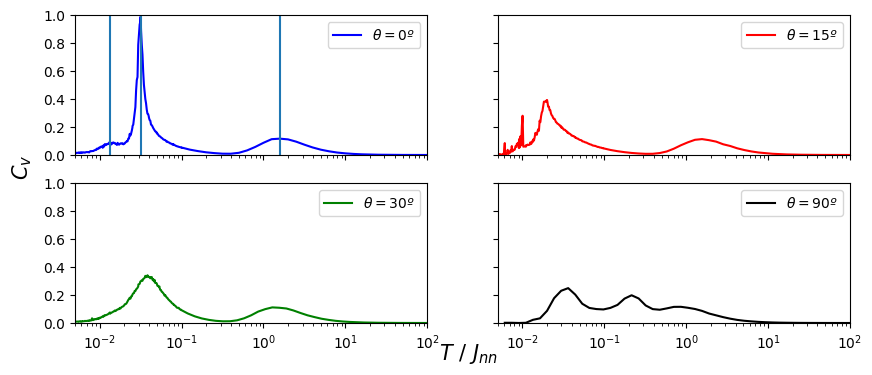

In [433]:
# plt.figure(figsize=(10, 5))

fig, axes = plt.subplots(2, 2, figsize=(10, 4), sharex=True, sharey=True, squeeze=False)

axes[0,0].plot(dfteste.Temp/5, dfteste.Cv, label="$\\theta = 0º$", c='b')
axes[0,1].plot(df15.Temp/5, df15.Cv, label="$\\theta = 15º$", c='r')
axes[1,0].plot(df30.Temp/5, df30.Cv, label="$\\theta = 30º$", c='g')
axes[1,1].plot(energia90.Temp/5, energia90.Cv, label="$\\theta = 90º$", c='k')

# axes[0].set_title("$\\theta = 0º$")
# axes[1].set_title("$\\theta = 15º$")
# axes[2].set_title("$\\theta = 30º$")
# axes[3].set_title("$\\theta = 90º$")

iax = [(0,0), (0,1), (1,0), (1,1)]
for k in range(len(iax)):
    i, j = iax[k]
    axes[i,j].set_ylim(0, 1)
    axes[i,j].set_xlim(0.005, 100)
    axes[i,j].set_xscale('log')
    axes[i,j].set_label('f')
    axes[i,j].legend()

axes[0,0].vlines(1.584893, 0, 1)
axes[0,0].vlines(0.031623, 0, 1)
axes[0,0].vlines(0.013500, 0, 1)


    
# axes[0,0].set_ylabel('Cv')
# axes[1,0].set_ylabel('Cv')
# axes[i,j].set_xlabel('$T / $')

fig.text(0.518, 0.02, '$T$ / $J_{nn}$', ha='center', fontsize=15)
fig.text(0.06, 0.5, '$C_v$', va='center', rotation='vertical', fontsize=15)

# plt.savefig('cvs.png', bbox_inches=False)
# axes[3].set_xlabel('$T / J_{nn}$')

(-3.0654, 0.0911)


Text(0.06, 0.5, 'E')

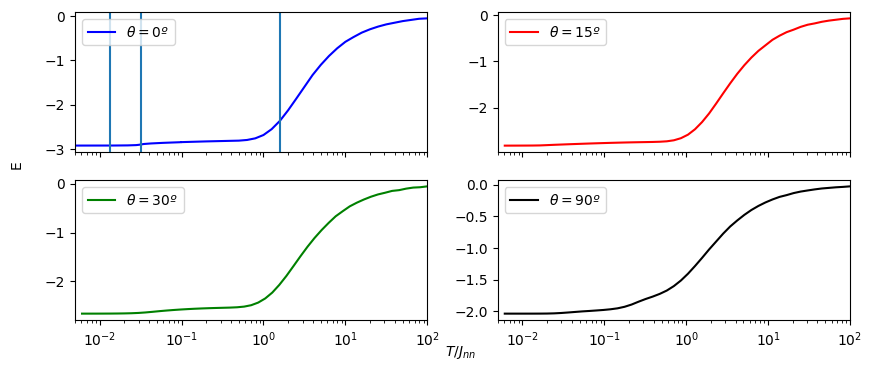

In [311]:
# plt.figure(figsize=(10, 5))

fig, axes = plt.subplots(2, 2, figsize=(10, 4), sharex=True, sharey=False, squeeze=False)

axes[0,0].plot(dfteste.Temp/5, dfteste.En, label="$\\theta = 0º$", c='b')
axes[0,1].plot(energia15.Temp/5, energia15.En, label="$\\theta = 15º$", c='r')
axes[1,0].plot(energia30.Temp/5, energia30.En, label="$\\theta = 30º$", c='g')
axes[1,1].plot(energia90.Temp/5, energia90.En, label="$\\theta = 90º$", c='k')

# axes[0].set_title("$\\theta = 0º$")
# axes[1].set_title("$\\theta = 15º$")
# axes[2].set_title("$\\theta = 30º$")
# axes[3].set_title("$\\theta = 90º$")

iax = [(0,0), (0,1), (1,0), (1,1)]
for k in range(len(iax)):
    i, j = iax[k]
#     axes[i,j].set_ylim(0, 1)
    axes[i,j].set_xlim(0.005, 100)
    axes[i,j].set_xscale('log')
    axes[i,j].set_label('f')
    axes[i,j].legend()
    
axes[0,0].vlines(1.584893, -3.0654, 0.0911)
axes[0,0].vlines(0.031623, -3.0654, 0.0911)
axes[0,0].vlines(0.013500, -3.0654, 0.0911)
axes[0,0].set_ylim(-3.0654, 0.0911)

print(axes[0,0].get_ylim())
    
# axes[0,0].set_ylabel('Cv')
# axes[1,0].set_ylabel('Cv')
# axes[i,j].set_xlabel('$T / $')

fig.text(0.51, 0.02, '$T / J_{nn}$', ha='center')
fig.text(0.06, 0.5, 'E', va='center', rotation='vertical')

# plt.savefig('cvs.png', bbox_inches=False)
# axes[3].set_xlabel('$T / J_{nn}$')

In [477]:
magnet00 = pd.read_csv('magnet00.csv', sep='\s+')
magnet00a = pd.read_csv('magnet00a.csv', sep='\s+')
magnet15 = pd.read_csv('magnet15.csv', sep='\s+')
magnet15a = pd.read_csv('magnet15a.csv', sep='\s+')
magnet30 = pd.read_csv('magnet30.csv', sep='\s+')
magnet30a = pd.read_csv('magnet30a.csv', sep='\s+')
magnet90 = pd.read_csv('magnet90.csv', sep='\s+')
magnet90a = pd.read_csv('magnet90a.csv', sep='\s+')

df15 = pd.concat([energia15, energia15a], axis=0)
df15 = df15.sort_values(by='Temp').reset_index()
df15 = df15.drop(['index'], axis=1)

mdf00 = pd.concat([magnet00, magnet00a], axis=0)
mdf00 = mdf00.sort_values(by='Temp').reset_index()
mdf00 = mdf00.drop(['index'], axis=1)

mdf15 = pd.concat([magnet15, magnet15a], axis=0)
mdf15 = mdf15.sort_values(by='Temp').reset_index()
mdf15 = mdf15.drop(['index'], axis=1)

mdf30 = pd.concat([magnet30, magnet30a], axis=0)
mdf30 = mdf30.sort_values(by='Temp').reset_index()
mdf30 = mdf30.drop(['index'], axis=1)

mdf90 = pd.concat([magnet90, magnet90a], axis=0)
mdf90 = mdf90.sort_values(by='Temp').reset_index()
mdf90 = mdf90.drop(['index'], axis=1)

(0.0307, 0.0911)


Text(0.06, 0.5, '$M_{xy}$')

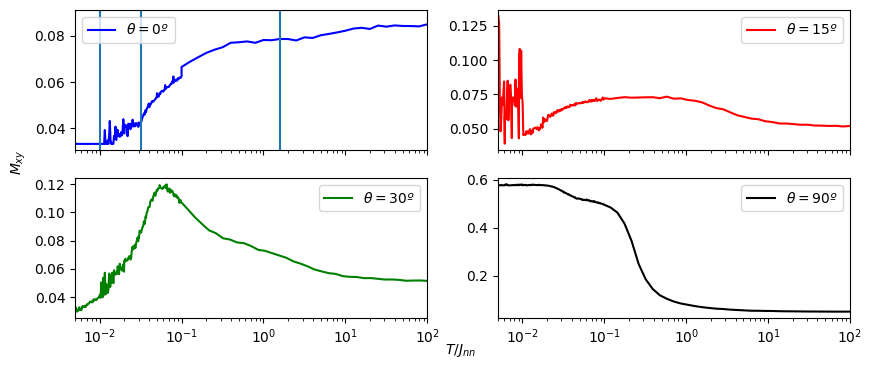

In [478]:
# plt.figure(figsize=(10, 5))

fig, axes = plt.subplots(2, 2, figsize=(10, 4), sharex=True, sharey=False, squeeze=False)

axes[0,0].plot(mdf00.Temp/5, mdf00.M, label="$\\theta = 0º$", c='b')
axes[0,1].plot(mdf15.Temp/5, mdf15.M, label="$\\theta = 15º$", c='r')
axes[1,0].plot(mdf30.Temp/5, mdf30.M, label="$\\theta = 30º$", c='g')
axes[1,1].plot(mdf90.Temp/5, mdf90.M, label="$\\theta = 90º$", c='k')

# axes[0].set_title("$\\theta = 0º$")
# axes[1].set_title("$\\theta = 15º$")
# axes[2].set_title("$\\theta = 30º$")
# axes[3].set_title("$\\theta = 90º$")

iax = [(0,0), (0,1), (1,0), (1,1)]
for k in range(len(iax)):
    i, j = iax[k]
#     axes[i,j].set_ylim(0, 1)
    axes[i,j].set_xlim(0.005, 100)
    axes[i,j].set_xscale('log')
    axes[i,j].set_label('f')
    axes[i,j].legend()
    
axes[0,0].vlines(1.584893, 0.0307, 0.0911)
axes[0,0].vlines(0.031623, 0.0307, 0.0911)
axes[0,0].vlines(0.010000, 0.0307, 0.0911)
axes[0,0].set_ylim( 0.0307, 0.0911)

print(axes[0,0].get_ylim())
    
# axes[0,0].set_ylabel('Cv')
# axes[1,0].set_ylabel('Cv')
# axes[i,j].set_xlabel('$T / $')

fig.text(0.51, 0.02, '$T / J_{nn}$', ha='center')
fig.text(0.06, 0.5, '$M_{xy}$', va='center', rotation='vertical')

# plt.savefig('M.png', bbox_inches=False)
# axes[3].set_xlabel('$T / J_{nn}$')

Text(0.06, 0.5, '$\\chi $')

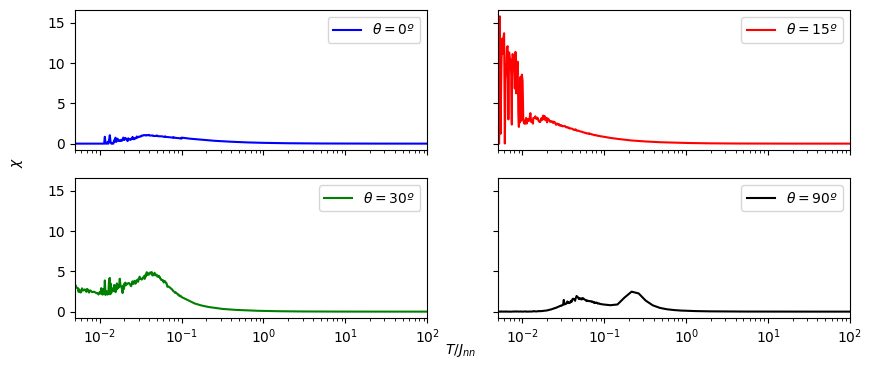

In [479]:
# plt.figure(figsize=(10, 5))

fig, axes = plt.subplots(2, 2, figsize=(10, 4), sharex=True, sharey=True, squeeze=False)

axes[0,0].plot(mdf00.Temp/5, mdf00.Suc, label="$\\theta = 0º$", c='b')
axes[0,1].plot(mdf15.Temp/5, mdf15.Suc, label="$\\theta = 15º$", c='r')
axes[1,0].plot(mdf30.Temp/5, mdf30.Suc, label="$\\theta = 30º$", c='g')
axes[1,1].plot(mdf90.Temp/5, mdf90.Suc, label="$\\theta = 90º$", c='k')

# axes[0].set_title("$\\theta = 0º$")
# axes[1].set_title("$\\theta = 15º$")
# axes[2].set_title("$\\theta = 30º$")
# axes[3].set_title("$\\theta = 90º$")

iax = [(0,0), (0,1), (1,0), (1,1)]
for k in range(len(iax)):
    i, j = iax[k]
#     axes[i,j].set_ylim(0, 1)
    axes[i,j].set_xlim(0.005, 100)
    axes[i,j].set_xscale('log')
    axes[i,j].set_label('f')
    axes[i,j].legend()
    
# axes[0,0].set_ylabel('Cv')
# axes[1,0].set_ylabel('Cv')
# axes[i,j].set_xlabel('$T / $')

fig.text(0.51, 0.02, '$T / J_{nn}$', ha='center')
fig.text(0.06, 0.5, '$\chi $', va='center', rotation='vertical')

# plt.savefig('M.png', bbox_inches=False)
# axes[3].set_xlabel('$T / J_{nn}$')

In [293]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 8,
                       ):
    print(dfteste)

             Temp          En          dE          Cv         dCv
0      0.00629463 -2.92195698  0.00000005  0.00018616  0.00011122
1      0.00792447 -2.92195707  0.00000000 -0.00000413  0.00000000
2      0.00997631 -2.92195617  0.00000016  0.00078798  0.00014140
3      0.01255943 -2.92195159  0.00000040  0.00297605  0.00021097
4      0.01581139 -2.92192922  0.00000089  0.00940661  0.00031237
5      0.01990536 -2.92189617  0.00000125  0.01178177  0.00023514
6      0.02505936 -2.92182052  0.00000178  0.01518930  0.00030018
7      0.02550431 -2.92179176  0.00000195  0.01758974  0.00044919
8      0.02601879 -2.92182553  0.00000175  0.01363908  0.00023563
9      0.02654365 -2.92180652  0.00000190  0.01534259  0.00038525
10     0.02707909 -2.92177269  0.00000197  0.01580943  0.00033312
11     0.02762534 -2.92176133  0.00000214  0.01805969  0.00034195
12     0.02818261 -2.92177491  0.00000197  0.01462349  0.00029320
13     0.02875112 -2.92176458  0.00000222  0.01784688  0.00046176
14     0.0

(0.0, 1.01)

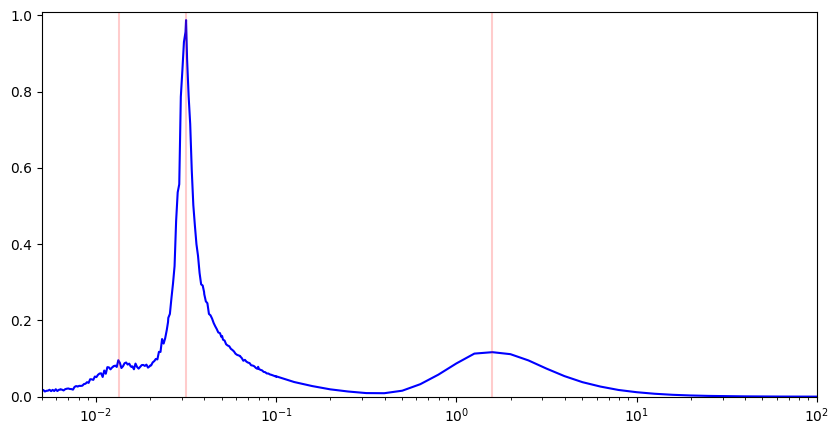

In [313]:
plt.figure(figsize=(10, 5))
# plt.errorbar(dfteste.Temp/5, dfteste.Cv, yerr=dfteste.dCv, fmt='.', label="$\\theta = 0º$", c='b')
plt.plot(dfteste.Temp/5, dfteste.Cv, label="$\\theta = 0º$", c='b')
plt.xscale('log')

plt.vlines(1.584893, 0, 1.01, alpha=0.2, color='r')
plt.vlines(0.031623, 0, 1.01, alpha=0.2, color='r')
plt.vlines(0.013500, 0, 1.01, alpha=0.2, color='r')

plt.xlim(0.005, 100)
plt.ylim(0, 1.01)

(-3.0, 0.0)

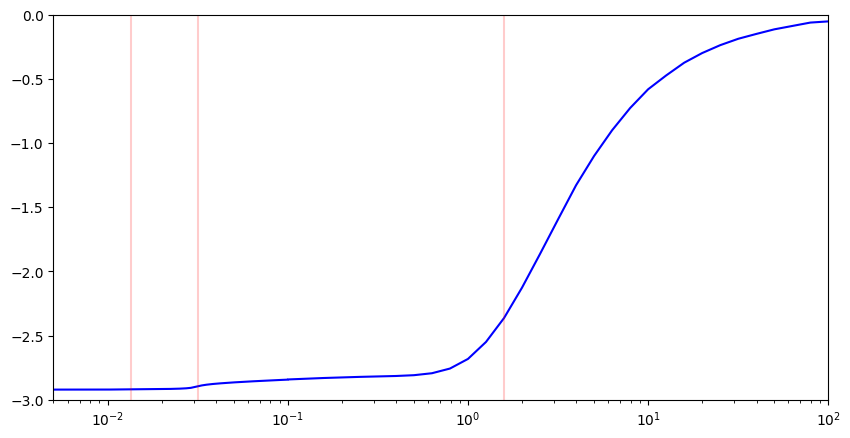

In [315]:
plt.figure(figsize=(10, 5))
# plt.errorbar(dfteste.Temp/5, dfteste.En, dfteste.dCv, fmt='.',label="$\\theta = 0º$", c='b')
plt.plot(dfteste.Temp/5, dfteste.En, label="$\\theta = 0º$", c='b')
plt.xscale('log')

plt.vlines(1.584893, -3, 0, alpha=0.2, color='r')
plt.vlines(0.031623, -3, 0, alpha=0.2, color='r')
plt.vlines(0.013500, -3, 0, alpha=0.2, color='r')

plt.xlim(0.005, 100)
plt.ylim(-3., 0)

In [296]:
magnet00 = pd.read_csv('magnet00.csv', sep='\s+')
magnet00a = pd.read_csv('magnet00a.csv', sep='\s+')
dfteste1 = pd.concat([magnet00, magnet00a], axis=0)
dfteste1 = dfteste1.sort_values(by='Temp').reset_index()
dfteste1 = dfteste1.drop(['index'], axis=1)
dfteste1 = dfteste1.drop([43]).reset_index()
dfteste1 = dfteste1.drop(['index'], axis=1)

(0.0, 1.2)

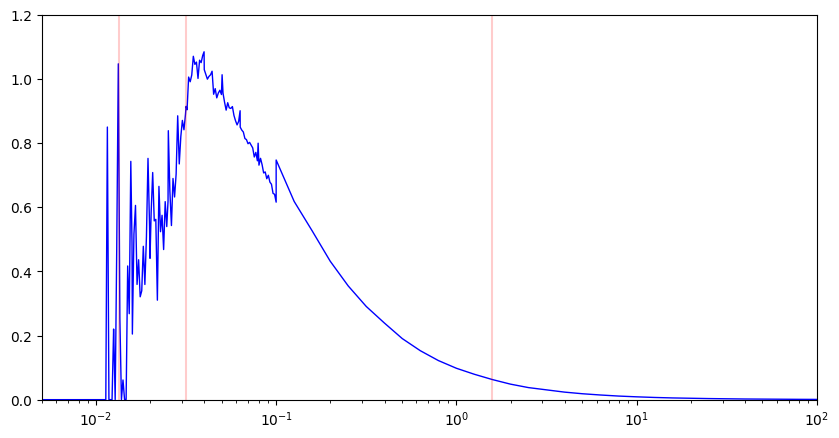

In [305]:
plt.figure(figsize=(10, 5))
plt.plot(dfteste1.Temp/5, dfteste1.Suc, lw=1, label="$\\theta = 0º$", c='b')
plt.xscale('log')

plt.vlines(1.584893, 0, 1.2, alpha=0.2, color='r')
plt.vlines(0.031623, 0, 1.2, alpha=0.2, color='r')
plt.vlines(0.013500, 0, 1.2, alpha=0.2, color='r')

plt.xlim(0.005, 100)
plt.ylim(0, 1.2)

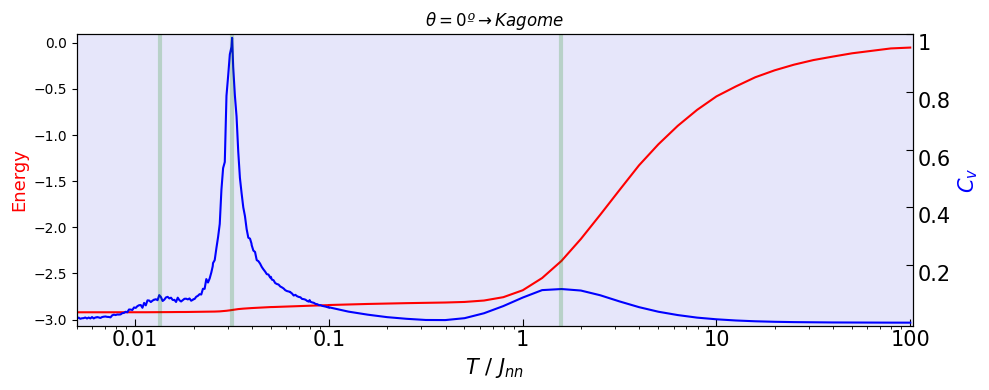

In [474]:
fig, ax2 = plt.subplots(figsize=(10, 4), facecolor=None)

ax2.set_ylabel('Energy', color='r', fontsize=13)  
ax2.plot(dfteste.Temp/5, dfteste.En, label="$\\theta = 0º$", c='r')
ax2.set_xscale('log')
ax2.set_xlabel('$T$ / $J_{nn}$', fontsize=15) 
ax2.tick_params(axis ='y') 

ax1 = ax2.twinx() 

ax1.set_xlim(0.005, 103)
ax1.set_ylim(-0.01, 1)
 
ax1.set_ylabel('$C_v$', color='b', fontsize=15)  
ax1.plot(dfteste.Temp/5, dfteste.Cv, label="$\\theta = 0º$", c='b')
ax1.set_xscale('log')
ax1.tick_params(axis ='y')  
 

ax1.vlines(1.584893, -0.01, 1, alpha=0.2, color='g', lw=3)
ax1.vlines(0.031623, -0.01, 1, alpha=0.2, color='g', lw=3)
ax1.vlines(0.013500, -0.01, 1, alpha=0.2, color='g', lw=3)


font_dict = {'fontsize': 15, 'verticalalignment':'top'}

# Set ticklabels

ax2.set_xticks([0.01, 0.1, 1, 10, 100])
ax2.set_xticklabels([r'0.01', r'0.1', r'1', r'10', r'100'], fontdict=font_dict)

ax1.set_yticks([ 0.2, 0.4, 0.6, 0.8, 1.])
ax1.set_yticklabels([ r'0.2', r'0.4', r'0.6', r'0.8', r'1'], fontdict=font_dict)

ax2.tick_params(axis='x', direction='in', length=5)
ax1.tick_params(axis='y', direction='in', length=5)

ax2.set_facecolor('lavender')
plt.title("$\\theta = 0º \\rightarrow Kagome$")
plt.tight_layout()

plt.savefig('00.png', bbox_inches=False)
plt.show()

![](img.png)

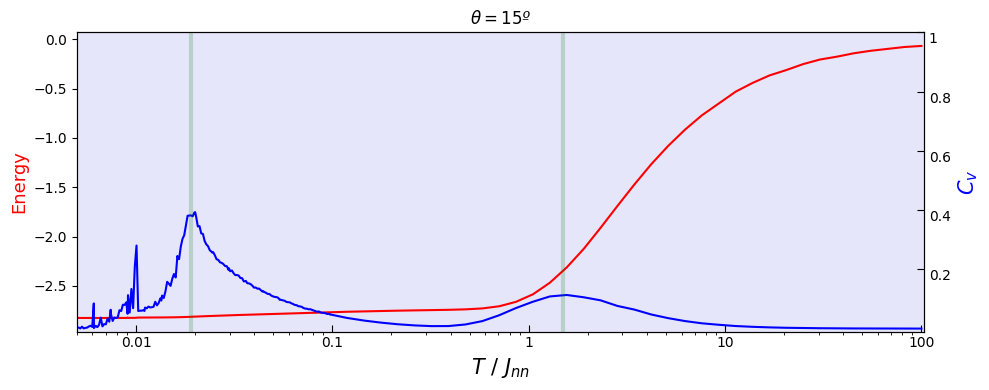

In [467]:
df15 = pd.concat([energia15, energia15a], axis=0)
df15 = df15.sort_values(by='Temp').reset_index()
df15 = df15.drop(['index'], axis=1)
# df15 = df15.drop([43]).reset_index()
# df15 = df15.drop(['index'], axis=1)

fig, ax2 = plt.subplots(figsize=(10, 4), facecolor=None)

ax2.set_ylabel('Energy', color='r', fontsize=13)  
ax2.plot(df15.Temp/5, df15.En, label="$\\theta = 0º$", c='r')
ax2.set_xscale('log')
ax2.set_xlabel('$T$ / $J_{nn}$', fontsize=15) 
ax2.tick_params(axis ='y') 

ax1 = ax2.twinx() 

ax1.set_xlim(0.005, 103)
ax1.set_ylim(-0.01, 1)
 
ax1.set_ylabel('$C_v$', color='b', fontsize=15)  
ax1.plot(df15.Temp/5, df15.Cv, label="$\\theta = 0º$", c='b')
ax1.set_xscale('log')
ax1.tick_params(axis ='y')  
 

ax1.vlines(1.5, -0.01, 1, alpha=0.2, color='g', lw=3)
ax1.vlines(0.019, -0.01, 1, alpha=0.2, color='g', lw=3)


font_dict = {'fontsize': 10, 'verticalalignment':'top'}

# Set ticklabels

ax2.set_xticks([0.01, 0.1, 1, 10, 100])
ax2.set_xticklabels([r'0.01', r'0.1', r'1', r'10', r'100'], fontdict=font_dict)

ax1.set_yticks([ 0.2, 0.4, 0.6, 0.8, 1.])
ax1.set_yticklabels([ r'0.2', r'0.4', r'0.6', r'0.8', r'1'], fontdict=font_dict)

ax2.tick_params(axis='x', direction='in', length=5)
ax1.tick_params(axis='y', direction='in', length=5)

ax2.set_facecolor('lavender')
plt.title("$\\theta = 15º$")
plt.tight_layout()

plt.savefig('15.png', bbox_inches=False)
plt.show()

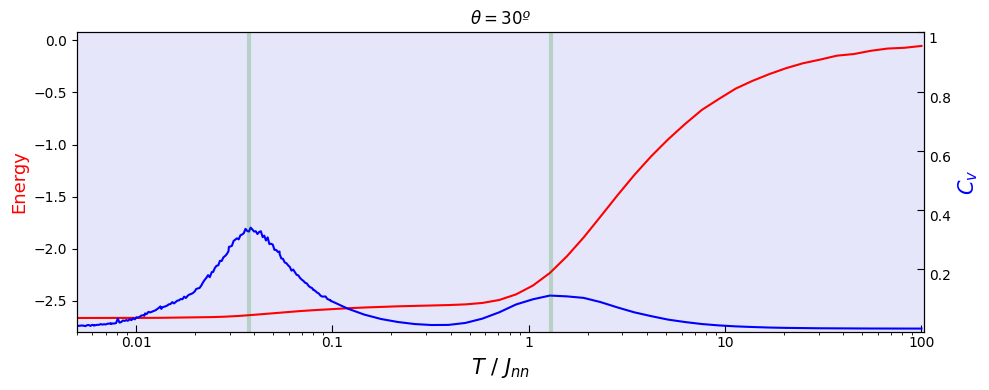

In [466]:
df30 = pd.concat([energia30, energia30a], axis=0)
df30 = df30.sort_values(by='Temp').reset_index()
df30 = df30.drop(['index'], axis=1)
# df15 = df15.drop([43]).reset_index()
# df15 = df15.drop(['index'], axis=1)

fig, ax2 = plt.subplots(figsize=(10, 4), facecolor=None)

ax2.set_ylabel('Energy', color='r', fontsize=13)  
ax2.plot(df30.Temp/5, df30.En, label="$\\theta = 0º$", c='r')
ax2.set_xscale('log')
ax2.set_xlabel('$T$ / $J_{nn}$', fontsize=15) 
ax2.tick_params(axis ='y') 

ax1 = ax2.twinx() 

ax1.set_xlim(0.005, 103)
ax1.set_ylim(-0.01, 1)
 
ax1.set_ylabel('$C_v$', color='b', fontsize=15)  
ax1.plot(df30.Temp/5, df30.Cv, label="$\\theta = 30º$", c='b')
ax1.set_xscale('log')
ax1.tick_params(axis ='y')  
 

ax1.vlines(1.3, -0.01, 1, alpha=0.2, color='g', lw=3)
ax1.vlines(0.0378, -0.01, 1, alpha=0.2, color='g', lw=3)

font_dict = {'fontsize': 10, 'verticalalignment':'top'}

# Set ticklabels

ax2.set_xticks([0.01, 0.1, 1, 10, 100])
ax2.set_xticklabels([r'0.01', r'0.1', r'1', r'10', r'100'], fontdict=font_dict)

ax1.set_yticks([ 0.2, 0.4, 0.6, 0.8, 1.])
ax1.set_yticklabels([ r'0.2', r'0.4', r'0.6', r'0.8', r'1'], fontdict=font_dict)

ax2.tick_params(axis='x', direction='in', length=5)
ax1.tick_params(axis='y', direction='in', length=5)

ax2.set_facecolor('lavender')
plt.title("$\\theta = 30º$")
plt.tight_layout()

plt.savefig('30.png', bbox_inches=False)
plt.show()

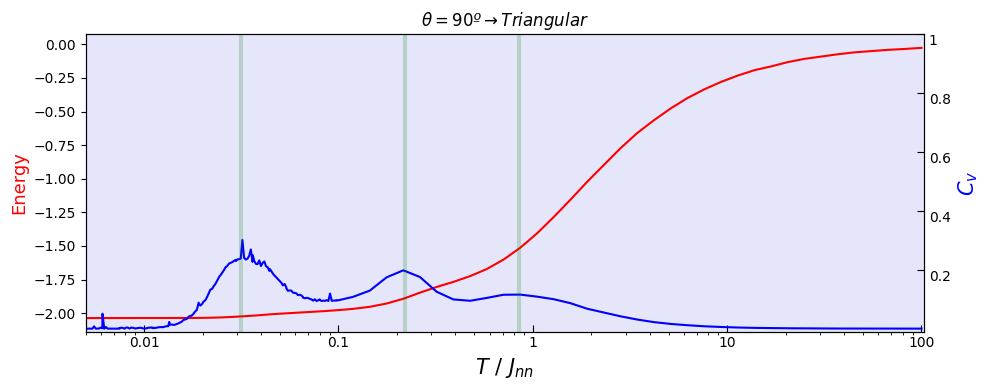

In [473]:
df90 = pd.concat([energia90, energia90a], axis=0)
df90 = df90.sort_values(by='Temp').reset_index()
df90 = df90.drop(['index'], axis=1)
# df15 = df15.drop([43]).reset_index()
# df15 = df15.drop(['index'], axis=1)

fig, ax2 = plt.subplots(figsize=(10, 4), facecolor=None)

ax2.set_ylabel('Energy', color='r', fontsize=13)  
ax2.plot(df90.Temp/5, df90.En, label="$\\theta = 0º$", c='r')
ax2.set_xscale('log')
ax2.set_xlabel('$T$ / $J_{nn}$', fontsize=15) 
ax2.tick_params(axis ='y') 

ax1 = ax2.twinx() 

ax1.set_xlim(0.005, 103)
ax1.set_ylim(-0.01, 1)
 
ax1.set_ylabel('$C_v$', color='b', fontsize=15)  
ax1.plot(df90.Temp/5, df90.Cv, label="$\\theta = 90º$", c='b')
ax1.set_xscale('log')
ax1.tick_params(axis ='y')  
 

ax1.vlines(.85, -0.01, 1, alpha=0.2, color='g', lw=3)
ax1.vlines(0.22, -0.01, 1, alpha=0.2, color='g', lw=3)
ax1.vlines(0.031623, -0.01, 1, alpha=0.2, color='g', lw=3)

font_dict = {'fontsize': 10, 'verticalalignment':'top'}

# Set ticklabels

ax2.set_xticks([0.01, 0.1, 1, 10, 100])
ax2.set_xticklabels([r'0.01', r'0.1', r'1', r'10', r'100'], fontdict=font_dict)

ax1.set_yticks([ 0.2, 0.4, 0.6, 0.8, 1.])
ax1.set_yticklabels([ r'0.2', r'0.4', r'0.6', r'0.8', r'1'], fontdict=font_dict)

ax2.tick_params(axis='x', direction='in', length=5)
ax1.tick_params(axis='y', direction='in', length=5)

ax2.set_facecolor('lavender')
plt.title("$\\theta = 90º \\rightarrow Triangular$")
plt.tight_layout()

plt.savefig('90.png', bbox_inches=False)
plt.show()

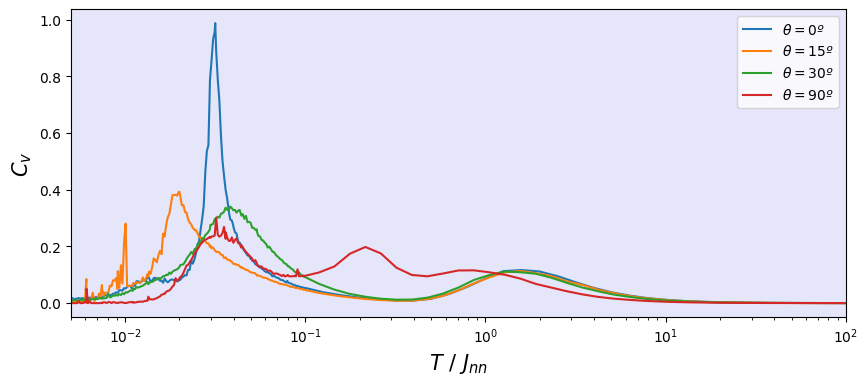

In [439]:
plt.figure(figsize=(10,4), facecolor=None)

ax = plt.gca()
ax.set_facecolor('lavender')
ax.set_ylabel('$C_v$', fontsize=15) 

plt.plot(dfteste.Temp/5, dfteste.Cv, label="$\\theta = 0º$")
plt.plot(df15.Temp/5, df15.Cv, label="$\\theta = 15º$")
plt.plot(df30.Temp/5, df30.Cv, label="$\\theta = 30º$")
plt.plot(df90.Temp/5, df90.Cv, label="$\\theta = 90º$")

plt.xlabel('$T$ / $J_{nn}$', fontsize=15)
plt.xlim(0.005, 100)
plt.xscale('log')
plt.legend()